<a href="https://colab.research.google.com/github/priyansh-shankhdhar/Dibetic-retinopathy-detection/blob/master/diabetic_retinopathy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Including the library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

In [ ]:
df=pd.read_csv('../input/aptos2019-blindness-detection/test.csv')
df_=pd.read_csv('../input/aptos2019-blindness-detection/train.csv')
df_['id_code'].count()

3662

# Visualising the data we have

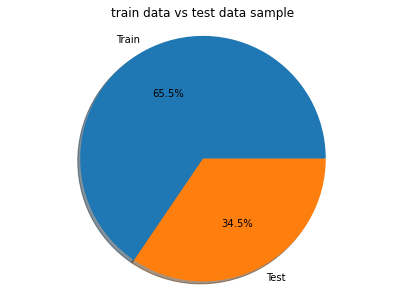

In [ ]:
labels = 'Train', 'Test'
sizes = df_.shape[0], df.shape[0]
colors = 'lightskyblue', 'lightcoral'
# Plot
plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('train data vs test data sample')
plt.show()

In [ ]:
test_path='../input/aptos2019-blindness-detection/train_images'

In [ ]:
x=df_.id_code#np.array(df_.id_code)
y=df_.diagnosis#np.array(df_.diagnosis)

(3295,) (3295,) (367,) (367,)


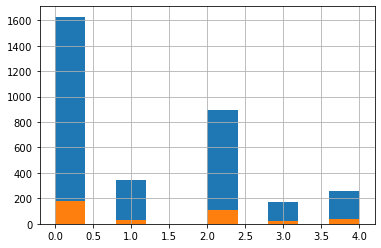

In [ ]:
train_x,valid_x,train_y,valid_y=train_test_split(x,y,test_size=0.1,random_state=77)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()

**Creating the funtion to show images with diffrent filters**

In [ ]:
def printing(cmp):
    o=1
    fig=plt.figure(figsize=(25,15))
    for i in y.unique():
        x=df_.loc[df_['diagnosis'] == i].sample(5, random_state=17)#.iterrows())
        for j in x.id_code:
            #print(os.path.join(test_path,j+'.png'))
            x=cv2.imread(os.path.join(test_path,j+'.png'))
            x=cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
            fig.add_subplot(5,5,o,xticks=[], yticks=[])
            o+=1
            plt.title('class '+str(i))
            plt.imshow(x,cmap='gray')
            x=cv2.resize(x,(300,300))
            if cmp=='gray':
                x=cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
                plt.imshow(x,cmap=cmp)
            elif cmp=='ben':
                x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
                x=cv2.addWeighted ( x,4, cv2.GaussianBlur( x , (0,0),40) ,-4 ,128)
                plt.imshow(x,cmap='gray')
            elif cmp=='ben_c':
                x=cv2.addWeighted ( x,4, cv2.GaussianBlur( x , (0,0),40) ,-4 ,128)
                plt.imshow(x)
            else:
                plt.imshow(x)
  

**Grey filter**

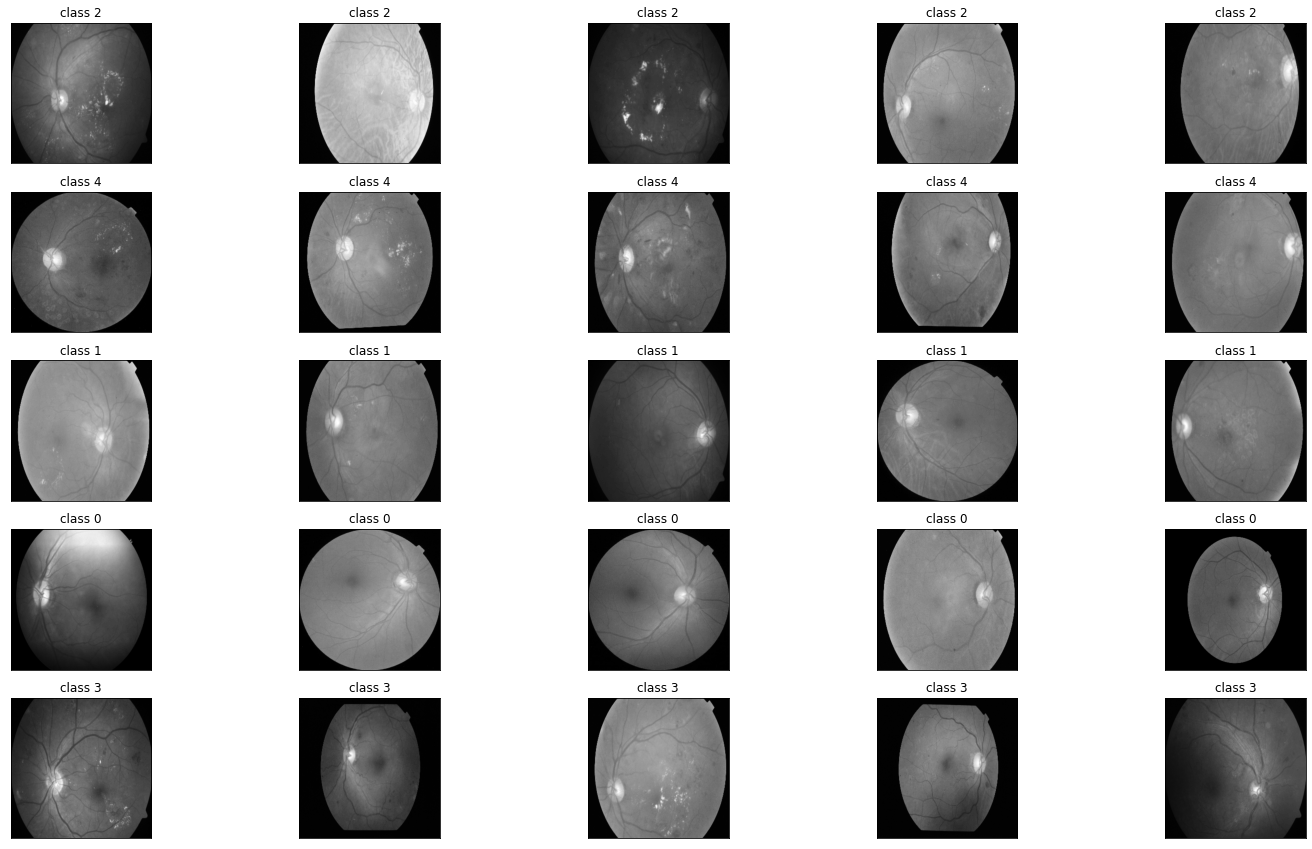

In [ ]:
printing(cmp='gray') 

**Gausian Blur**

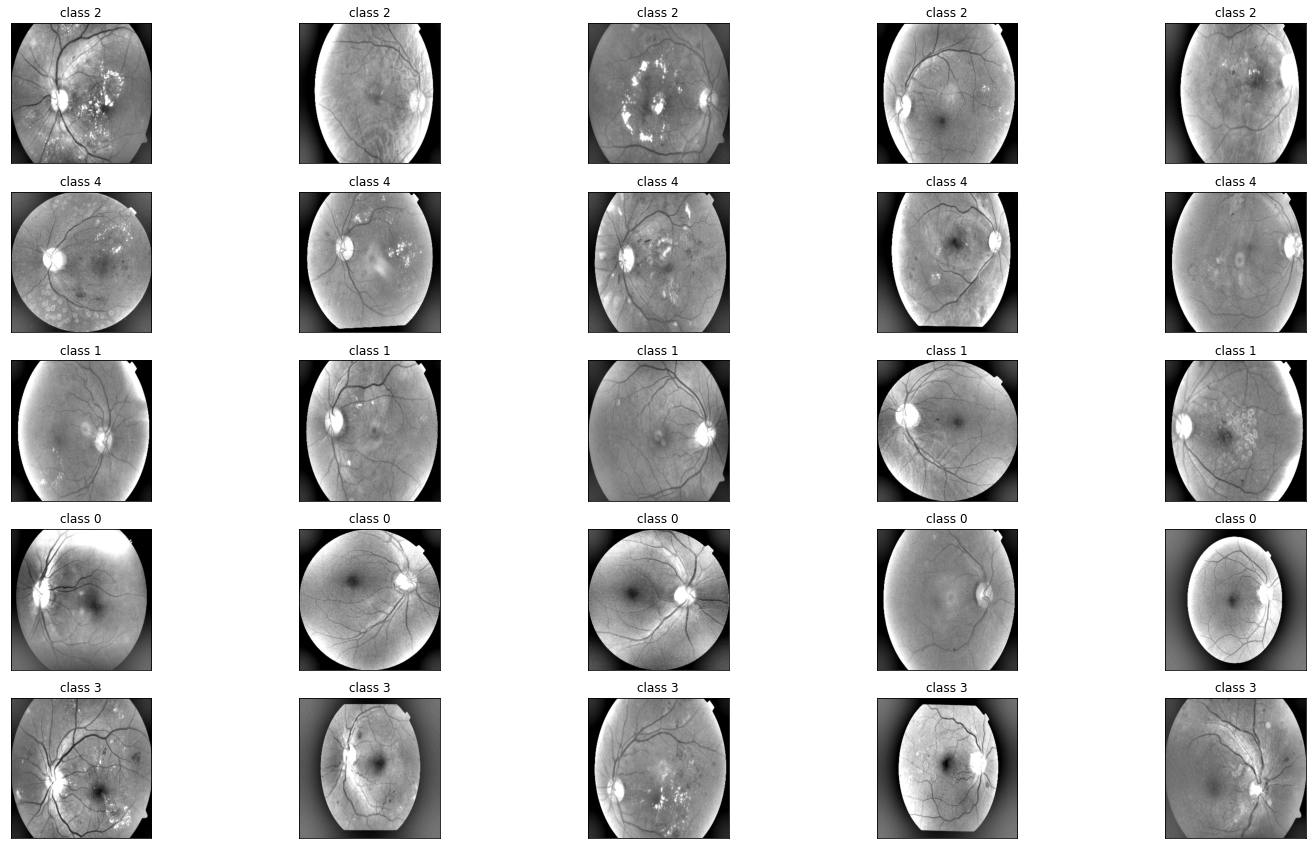

In [ ]:
printing(cmp='ben') 

**Gausian blur with coloured**

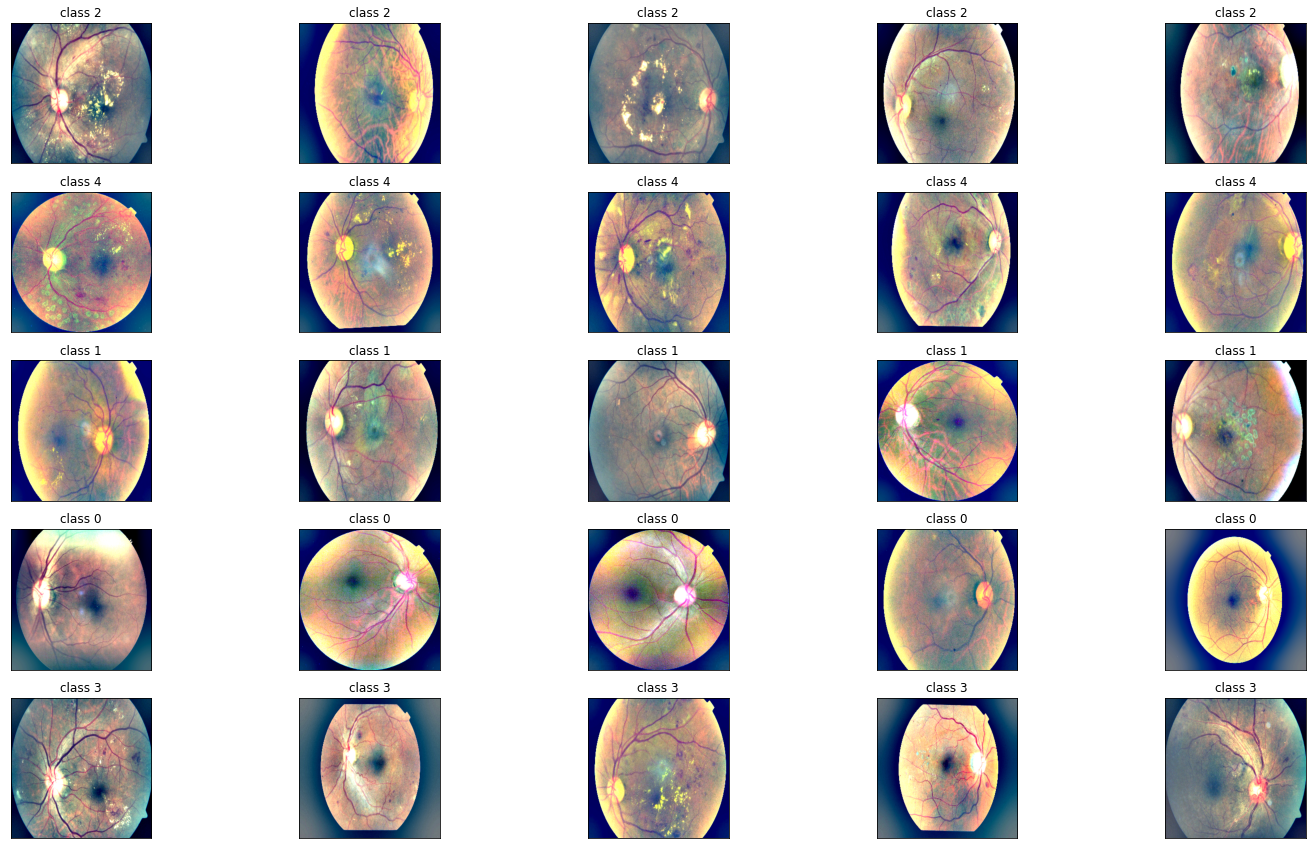

In [ ]:
printing(cmp='ben_c')

**Normal coloured images**

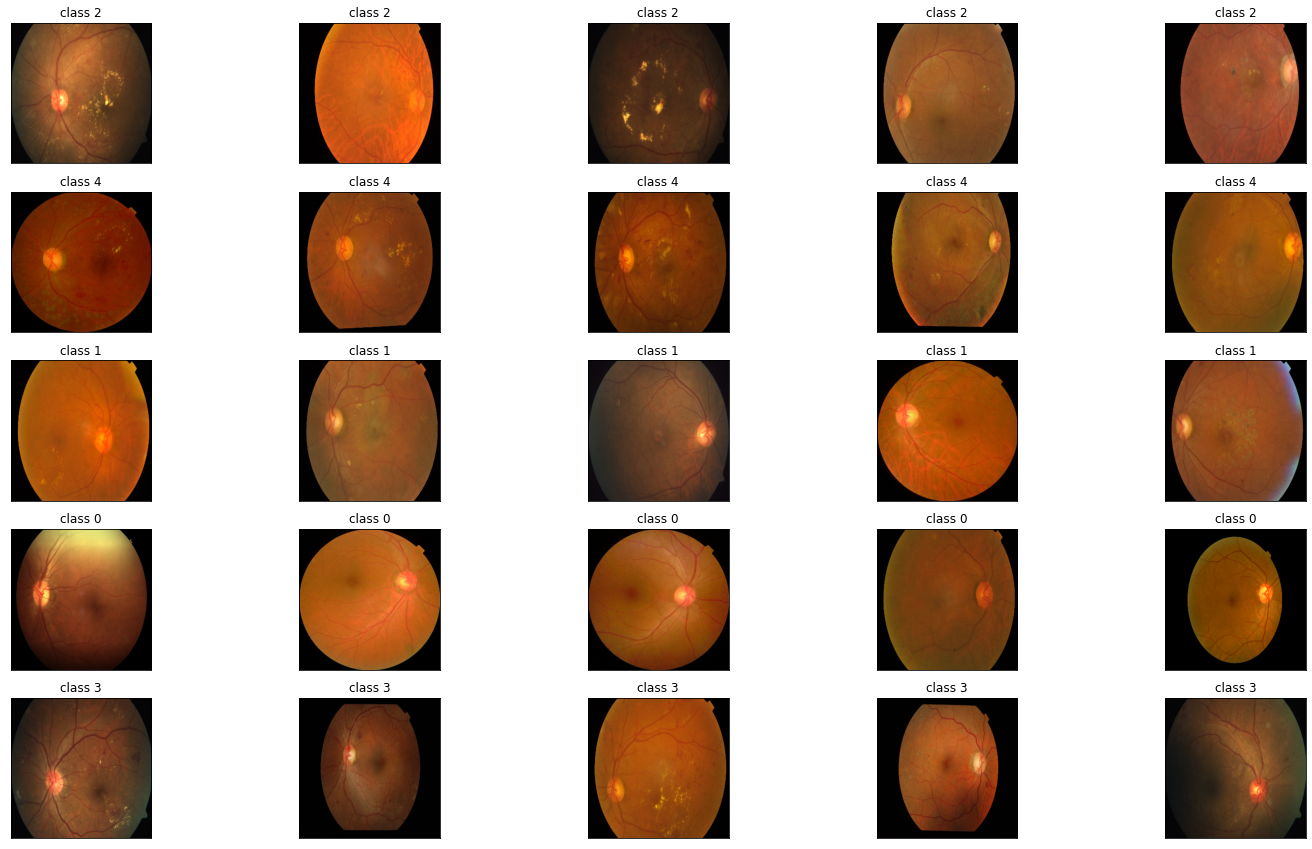

In [ ]:
printing(cmp='')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing

In [ ]:
def preprocessing_function(x):
    '''x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    x = cv2.cvtColor(x, cv2.COLOR_GRAY2RGB)'''
    x=cv2.addWeighted ( x,4, cv2.GaussianBlur( x , (0,0),40) ,-4 ,128)
    return x
#x=cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
def preprocessing_function2(x):
    x=cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x=cv2.addWeighted (x,4, cv2.GaussianBlur( x , (0,0),40) ,-4 ,128)
    return x

# Augmenting data

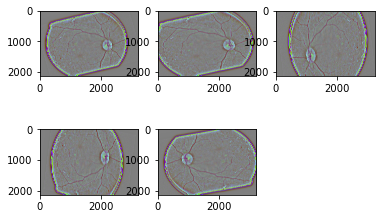

In [ ]:
aug_load= ImageDataGenerator(#rescale=1. / 255, 
                                         validation_split=0.15, 
                                         horizontal_flip=True,
                                         vertical_flip=True, 
                                         rotation_range=40, 
                                         zoom_range=0.2,
                                         shear_range=0.1,
                                         preprocessing_function=preprocessing_function2,
                                         fill_mode='constant',cval=0)

imgPath = f"../input/aptos2019-blindness-detection/train_images/cd54d022e37d.png"
# Loading image
img = load_img(imgPath)
data = img_to_array(img)
samples =np.expand_dims(data, 0)
i=5
it=aug_load.flow(samples , batch_size=1)
for i in range(5):
    plt.subplot(230 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()


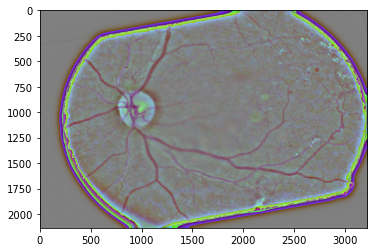

In [ ]:
plt.imshow(image)

**Updating ID name with full file path**

In [ ]:
df_.id_code = df_.id_code.apply(lambda x: x + ".png")
df.id_code = df.id_code.apply(lambda x: x + ".png")
df_['diagnosis'] = df_['diagnosis'].astype('str')
df_

id_code diagnosis
0     000c1434d8d7.png         2
1     001639a390f0.png         4
2     0024cdab0c1e.png         1
3     002c21358ce6.png         0
4     005b95c28852.png         0
...                ...       ...
3657  ffa47f6a7bf4.png         2
3658  ffc04fed30e6.png         0
3659  ffcf7b45f213.png         2
3660  ffd97f8cd5aa.png         0
3661  ffec9a18a3ce.png         2

[3662 rows x 2 columns]

**Loading data to put to train**

In [ ]:
augmented_loader=ImageDataGenerator(rescale=1. / 50, 
                                horizontal_flip=True,
                                vertical_flip=True, 
                                rotation_range=40, 
                                zoom_range=0.2, 
                                shear_range=0.1,
                                fill_mode='constant',cval=0,
                                preprocessing_function=preprocessing_function2)
train_val_loader=ImageDataGenerator(rescale=1. / 50, 
                                validation_split=0.15,
                                preprocessing_function=preprocessing_function2)

In [ ]:
train_dir='../input/aptos2019-blindness-detection/train_images'
test_dir='../input/aptos2019-blindness-detection/test_images'
train_datagenerator=train_val_loader.flow_from_dataframe(dataframe=df_,
                                                    directory=train_dir,
                                                    x_col='id_code',
                                                    y_col='diagnosis',
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(255,255),
                                                    subset='training',
                                                    shaffle=True,
                                                    seed=17)
                                                
validation_generator=train_val_loader.flow_from_dataframe(dataframe=df_,
                                                    directory=train_dir,
                                                    x_col='id_code',
                                                    y_col='diagnosis',
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(255,255),
                                                    subset='validation',
                                                    shaffle=True,
                                                    seed=17)
                                                    

aug_genrator=augmented_loader.flow_from_dataframe(dataframe=df_,
                                                    directory=train_dir,
                                                    x_col='id_code',
                                                    y_col='diagnosis',
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(255,255),
                                                    seed=17)
                                                    

Found 3113 validated image filenames belonging to 5 classes.
Found 549 validated image filenames belonging to 5 classes.
Found 3662 validated image filenames belonging to 5 classes.


# Creating the model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(65,(3,3),activation='relu',input_shape=(255,255,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(800,activation='relu'),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 65)      1820      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 65)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 128)     75008     
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 128)     512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 256)     295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 256)       0

In [ ]:

reduce_lr = ReduceLROnPlateau(monitor='loss', min_delta=0.0004, patience=3, factor=0.1, min_lr=1e-6, mode='auto',
                              verbose=1)
from keras.optimizers import Adam
opt=Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])


# Transfer Learning

In [ ]:
input_tensor=tf.keras.layers.Input(shape=(255,255,3))

base_model = tf.keras.applications.ResNet50(weights='imagenet',
                                            include_top=False,
                                            input_tensor=input_tensor)
for layer in base_model.layers:
    layer.trainable=True
base_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 261, 261, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

**Adding more layers to transfered model**

In [ ]:
x=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(2048,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dense(5,activation='softmax')(x) 

model=tf.keras.Model(inputs=input_tensor,outputs=x)
model.summary()

## funtion for plotting the losses and accuracy
def plot_metrics(history,epochs):
    epoch=range(1,epochs+1)
    loss=history.history['loss']
    accuracy=history.history['acc']
    vlos=history.history['val_loss']
    vacc=history.history['val_acc']
    plt.title('Loss graph')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(epoch,loss)
    plt.plot(epoch,vlos)
    plt.show()
    plt.title('Accuracy graph')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(epoch,accuracy)
    plt.plot(epoch,vacc)
    plt.show()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 261, 261, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-6, mode='auto',
                              verbose=1)
from keras.optimizers import Adam
opt=Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [ ]:
epochs=30
history=model.fit_generator(aug_genrator,
                            epochs=epochs,
                            steps_per_epoch=20,
                            validation_data = validation_generator,
                            validation_steps=10,
                            callbacks=[reduce_lr])

Epoch 1/30
20/20 [==============================] - 48s 2s/step - loss: 1.5698 - acc: 0.5000 - val_loss: 3585.3486 - val_acc: 0.0900 - lr: 0.0010
Epoch 2/30
20/20 [==============================] - 46s 2s/step - loss: 1.1056 - acc: 0.6250 - val_loss: 987.8726 - val_acc: 0.4300 - lr: 0.0010
Epoch 3/30
20/20 [==============================] - 46s 2s/step - loss: 1.2959 - acc: 0.5700 - val_loss: 3410.3782 - val_acc: 0.2800 - lr: 0.0010
Epoch 4/30
20/20 [==============================] - 47s 2s/step - loss: 1.2383 - acc: 0.5850 - val_loss: 3.8174 - val_acc: 0.4200 - lr: 0.0010
Epoch 5/30
20/20 [==============================] - 49s 2s/step - loss: 1.2691 - acc: 0.6450 - val_loss: 3.0211 - val_acc: 0.3600 - lr: 0.0010
Epoch 6/30
20/20 [==============================] - 48s 2s/step - loss: 1.1890 - acc: 0.5650 - val_loss: 1806.1428 - val_acc: 0.4200 - lr: 0.0010
Epoch 7/30
20/20 [==============================] - 49s 2s/step - loss: 1.2388 - acc: 0.5600 - val_loss: 1.5398 - val_acc: 0.4200 -

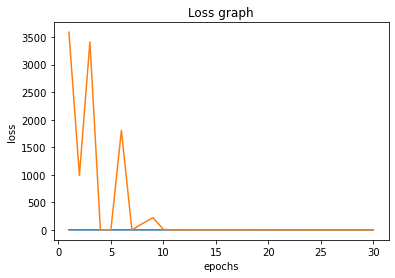

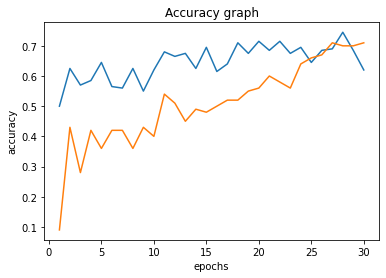

In [ ]:
plot_metrics(history,epochs)

# now we train on augmented data

In [ ]:
epochs=13
history=model.fit_generator(aug_genrator,
                            epochs=epochs,
                            steps_per_epoch=40,
                            validation_data = validation_generator,
                            validation_steps=20,
                            callbacks=[reduce_lr])

Epoch 1/13
40/40 [==============================] - 90s 2s/step - loss: 0.9082 - acc: 0.6775 - val_loss: 0.8419 - val_acc: 0.6950 - lr: 1.0000e-06
Epoch 2/13
40/40 [==============================] - 89s 2s/step - loss: 0.8449 - acc: 0.7375 - val_loss: 0.7483 - val_acc: 0.7200 - lr: 1.0000e-06
Epoch 3/13
40/40 [==============================] - 89s 2s/step - loss: 1.0037 - acc: 0.6675 - val_loss: 0.7924 - val_acc: 0.7600 - lr: 1.0000e-06
Epoch 4/13
40/40 [==============================] - 87s 2s/step - loss: 0.9706 - acc: 0.6875 - val_loss: 0.7703 - val_acc: 0.7100 - lr: 1.0000e-06
Epoch 5/13
40/40 [==============================] - 87s 2s/step - loss: 1.0210 - acc: 0.6500 - val_loss: 0.8392 - val_acc: 0.7000 - lr: 1.0000e-06
Epoch 6/13
40/40 [==============================] - 88s 2s/step - loss: 0.9325 - acc: 0.7050 - val_loss: 0.8526 - val_acc: 0.6900 - lr: 1.0000e-06
Epoch 7/13
40/40 [==============================] - 90s 2s/step - loss: 0.8861 - acc: 0.6800 - val_loss: 0.8751 - val_

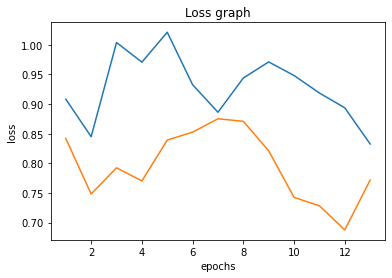

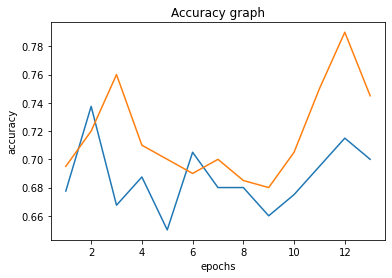

In [ ]:
plot_metrics(history,epochs)